## **Student Name: Basma Abd-Elwahab**
## **Student ID: 300327209**

The purpose of this assignment is to gain some experience working with the tools you will use throughout the course. You will learn:
- The basics of data loading and preparation
- Classification using the k-NN algorithm
- Classification using a Support Vector Machine (SVM)
- Calculation of metrics to assess the performance of your model

### Submission Details
Submit your Jupyter notebook .ipynb file using Brightspace. Do not include any other files or images as they will not be reviewed.
<p>
<strong>Make certain that you run all the cells in the notebook you will submit</strong> or you will loose marks.
</p>
<ul>
<li>You can submit multiple times, but only the most recent submission will be saved</li>
<li>Do not wait until the last minute to submit in case you have an unexpected issue</li>
<li>Review the late policy in the syllabus</li>
<li><strong>You must submit your own work</strong> and abide by the University of Ottawa policy on plagiarism and fraud</li>
</ul>


## Part 0. Dataset Preparation
To complete the assignment you will need to download the Cifar10 dataset and devise an appropriate training set split. You may acquire the dataset using the method of your choice. Note that some sources e.g. sklearn have reduced the samples to only 1797 (this could negatively affect your results). If you use the full dataset, you are free to sample from the dataset to reduce the overal training samples. The overall accuracy is less important than your  observations and comparisons. For example classifying the full 10,000 test images might take approximately 15 minutes using k-NN.

In this section:
<ul>
<li>Download the dataset as described above</li>
<li>Divide the raw data into appropriate training and test sets for both the images and corresponding labels for use with the subsequent parts of the assignment.</li>
<li>Visualize five samples of each class by plotting a grid using the matplotlib library.</li>
</ul>


### **Install dependencies and Import Important libraries**

In [1]:
#Install tensorflow
!pip install tensorflow 

In [1]:
import tensorflow as tf

# Display the version of tensorflow
print(tf.__version__)

#import important libraries
import numpy as np  #to deal with arrays
import pandas as pd #to deal with dataframes
import matplotlib.pyplot as plt  #for plotting 
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split #for train and test split
from scipy.stats import mode # calculates the mode of the array elements along the specified axis of the array
from sklearn.metrics import classification_report #to use the function of classification report
from sklearn.metrics import confusion_matrix   #for calculating confusion matrix 
from sklearn.metrics import plot_confusion_matrix  #for plotting confusion matrix 
from sklearn.metrics import accuracy_score #for calculating accuracy score
from sklearn.svm import LinearSVC #for linear SVC model
from sklearn.linear_model import LogisticRegression #for logistic regression
from sklearn.decomposition import PCA #for dimensionality reduction
import seaborn as sns #for plotting

2.8.0


### **Load the dataset and splitting**

In [2]:
# Load the dataset
df = tf.keras.datasets.cifar10

In [3]:
#split the dataset into train and test split
(X_train, Y_train), (X_test, Y_test) = df.load_data()
#Print shapes of the data
print("x_train shape is: " ,  X_train.shape)
print("y_train shape is: " ,  Y_train.shape)
print("x_test shape is: " ,  X_test.shape)
print("y_test shape is: " ,  Y_test.shape)

x_train shape is:  (50000, 32, 32, 3)
y_train shape is:  (50000, 1)
x_test shape is:  (10000, 32, 32, 3)
y_test shape is:  (10000, 1)


In [4]:
#split the dataset using train test split to take sample from of the data 
#use stratify to take the same number from every class
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, train_size=0.4, stratify =Y_train, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, stratify =Y_train, random_state=42)

In [5]:
#Print the new shapes of the data
print("x_train shape is: " ,  X_train.shape)
print("y_train shape is: " ,  Y_train.shape)
print("x_test shape is: " ,  X_test.shape)
print("y_test shape is: " ,  Y_test.shape)

x_train shape is:  (16000, 32, 32, 3)
y_train shape is:  (16000, 1)
x_test shape is:  (4000, 32, 32, 3)
y_test shape is:  (4000, 1)


### **Visualize the classes of the data**

In [6]:
#Visualize five samples of each class by plotting a grid using the matplotlib library.
ten_classes = ['plane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

number_of_classes = len(ten_classes)

#set the number of samples to 5
samples_for_class = 5

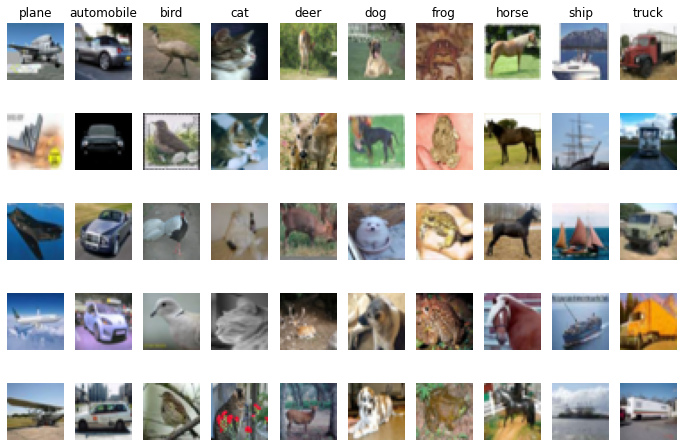

In [7]:
#set the figure size to show
plt.figure(figsize=(12,8))

#for loop to plot 5 samples of each class
for y, classes in enumerate(ten_classes):
    index = np.flatnonzero(Y_train == y)
    index = np.random.choice(index, samples_for_class, replace=False)
    
    for i, idx in enumerate(index):
        plt_idx = i * number_of_classes + y + 1
        plt.subplot(samples_for_class, number_of_classes, plt_idx)
        
        #to show the images using matplotlip
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(classes)
            
plt.show()

### **Reshape the image and scaling**

In [8]:
# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(16000, 3072) (4000, 3072)


In [9]:
X_train = X_train / 255
X_test = X_test / 255

## Part 1. k-NN Classifier (2 Marks)
For this section you will implement a simple kNN Classifier on the Cifar10 dataset. To do this you will need to perform the following steps:
- Create a k-NN class. Your class must contain a method that returns predictions for your test set.
- Provide a suitable distance metric that you will use to calculate the nearest neightbours. You may choose the distance metric you believe is most suitable.
- Calculate the k nearest neighbours and make predictions.
- Choose the a value for _k_ that results in the highest accuracy on your test set. Show how you found this value.

When your classifier is working:
- Use sklearn to calculate accuracy and plot a confusion matrix using your predictions.
- Provide a brief discussion of your results

### Bonus:

When you compute the distance metric you can acheive better performance if you vectorize the computation instead of using for loops to iterate through the values. You can earn __0.5 bonus marks__ if you only need one loop, or __1 bonus mark__ if you can omit for loops for a fully vectorized distance calculation (a maximum of 1 bonus mark is available).




### **Create the KNN Classifier from scratch using Eculidian distance calculation Using one for loop**

In [12]:
#Intialize the KNN class
class KNearest_Neighbors_Classifier() :
    def __init__( self, K ) :
        self.K = K

  #to fit the model on the training data
    def fit( self, X_train, Y_train ) :
    #set the X_train and Y_train
        self.X_train = X_train
        self.Y_train = Y_train
        #set the number of training and number of features
        self.m, self.n = X_train.shape

  #to make the prediction on the model
    def predict( self, X_test ) :
        self.X_test = X_test
        #set the number of test samples and number of features
        self.m_test, self.n = X_test.shape
        #define y for prediction
        y_pred = np.zeros( self.m_test )

        for i in range( self.m_test ) :
            x = self.X_test[i]

            #to find the K nearest neighbors
            neighbors = np.zeros( self.K )
            neighbors = self.find_neighbors( x )

            #to find the  most frequent class in K neighbors
            y_pred[i] = mode( neighbors )[0][0]	

        return y_pred

    #to find the K nearest neighbors
    def find_neighbors( self, x ) :
        #to calculate the euclidean distance
        distance = np.zeros( self.m )

        for i in range( self.m ) :
            d = self.euclidean( x, self.X_train[i] )
            distance[i] = d

        #to sort the Y_train values according to the distance
        index = distance.argsort()
        sorted_y_train = self.Y_train[index]

        return sorted_y_train[:self.K]

    #to calculate the euclidean distance
    def euclidean( self, x, x_train ) :
        return np.sqrt( np.sum( np.square( x - x_train ) ) )

In [13]:
#main function
def main() :

    KNN_model = KNearest_Neighbors_Classifier( K = 7 )
    KNN_model.fit( X_train, Y_train )

    # Prediction on test set
    Y_pred = KNN_model.predict( X_test )

    #to measure the performance
    correct = 0	
    c = 0

    for c in range( np.size( Y_pred ) ) :
        if Y_test[c] == Y_pred[c] :
            correct = correct + 1
        c = c + 1
    print( "Accuracy on test set by our model: ", (correct / c ) * 100 )


In [14]:
if __name__ == "__main__" :
    main()

Accuracy on test set by our model:  29.525000000000002


In [15]:
#define a list to store all the accuracies
accuracies_list = []
#for loop for prediction
for i in range(2, 12, 1):
    KNN_Model = KNeighborsClassifier(n_neighbors=i)
    KNN_Model.fit(X_train, Y_train)
    Predictions = KNN_Model.predict(X_test)
    accuracy = accuracy_score(Y_test, Predictions)
    accuracies_list.append({'k': i, 'accuracy': accuracy})

C:\Users\mm\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\mm\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\mm\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\mm\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

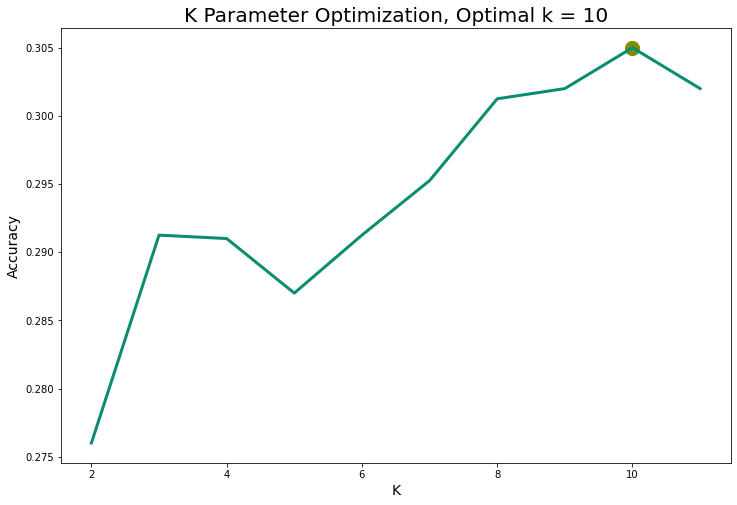

In [16]:
accuracies_list = pd.DataFrame(accuracies_list)
best_k = accuracies_list.sort_values(by='accuracy', ascending=False).iloc[0]
#define the plot size and color
plt.figure(figsize=(12, 8))
plt.plot(accuracies_list['k'], accuracies_list['accuracy'], lw=3, c='#088d70')
plt.scatter(best_k['k'], best_k['accuracy'], s=200, c='#808d08')
#for titles and labels
plt.title(f"K Parameter Optimization, Optimal k = {int(best_k['k'])}", size=20)
plt.xlabel('K', size=14)
plt.ylabel('Accuracy', size=14)
plt.show()

In [17]:
accuracies_list

,k,accuracy
0,2,0.27600
1,3,0.29125
2,4,0.29100
3,5,0.28700
4,6,0.29125
5,7,0.29525
6,8,0.30125
7,9,0.30200
8,10,0.30500
9,11,0.30200


In [18]:
#print the accuracy score 
accuracy = accuracy_score(Y_test, Predictions)
print(accuracy)

0.302


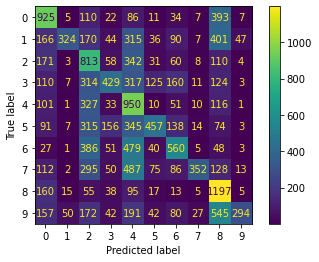

In [38]:
#confusion matrix on training
plot_confusion_matrix(KNN_Model,X_train,Y_train)

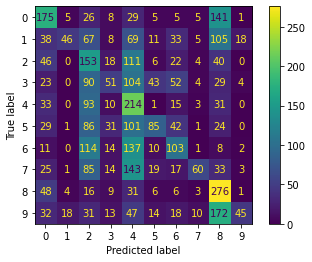

In [37]:
#confusion matrix on testing
plot_confusion_matrix(KNN_Model,X_test,  Y_test)

In [33]:
#main function
def main() :

    KNN_model = KNearest_Neighbors_Classifier( K = 10 )
    KNN_model.fit( X_train, Y_train )

    # Prediction on test set
    Y_pred = KNN_model.predict( X_test )

    #to measure the performance
    correct = 0	
    c = 0

    for c in range( np.size( Y_pred ) ) :
        if Y_test[c] == Y_pred[c] :
            correct = correct + 1
        c = c + 1
    print( "Accuracy on test set by our model when K = 10: ", (correct / c ) * 100 )


In [34]:
if __name__ == "__main__" :
    main_function()

Accuracy on test set by our model when K = 10:  30.5


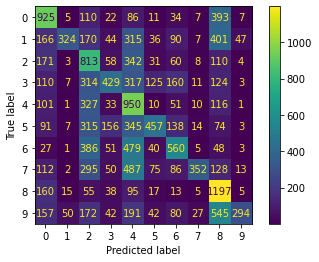

In [40]:
#confusion matrix on training
plot_confusion_matrix(KNN_Model,X_train,Y_train)

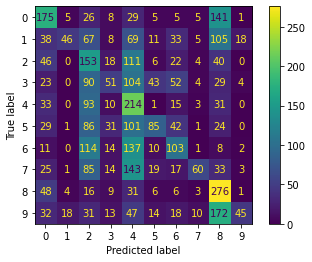

In [39]:
#confusion matrix on testing
plot_confusion_matrix(KNN_Model,X_test,  Y_test)

### **Comment on KNN class**

KNN is one of the techniques of supervised machine learning techniques, it works according to the following steps:

    1- Select the number K of the neighbors.
    
    2- calculate the distance between the points.
    
    3- find the nearby points.
    
    4- count the number of the data points in each category.
    
    5- Assign the new data points to a category.

- The KNN model has an accuracy score = 29.5 when training the model with k = 7

- After choosing the optimal k, the accuracy score = 30.5 

- The confusion matrix shows that the model can't classify the 10 classes correctly, because of the high dimensions of the images.

- As shown in the confusion matrix, the model classified 175 images as airplane from 400 airplane images and that is not enough to solve this problem.

- The main daigonal shows that the model can't classify the images well.

## Part 2. Logistic Regression (3 Marks)

For this section you will perform binary classification using logistic regression. Just as in Part 1. you will use the Cifar10 dataset, however to obtain a result for each class using logistic regression you will need to use a One-vs-Rest (OvR) approach to acheive multi-class classification.

Using ```LogisticRegression()``` in sklearn, write a function to execute the OvR strategy for the Cifar10 classes. Do not use the built-in ```OneVsResClassifier()``` method. You will need to follow these basic steps:
- Train a binary classifier for each class, where the target class is a "positive" results and the combination of the remaining classes are "negative". For Cifar10 you will need 10 models.
- For each test sample compute the probabilities for each model
- Select the argmax of the probabilities to obtain the predicted class

Collect your predictions from the test set and compute the accuracy score and plot a confusion matrix.

### **Develop a function for logistic regression OVR strategy**

In [20]:
#to make the prediction of 10 models
def logistic_One_VS_Rest(X_train,Y_train,X_test,Y_test, index): 
    
    #to train a binary classification for each class
    Y_train = (Y_train == index )
    Y_test = (Y_test == index)  
    
    #fit the model of the logistic regression 
    model = LogisticRegression().fit(X_train, Y_train) 
    
    #make the prediction of each model
    Y_prediction_ovr = model.predict( X_test )

    #calculate the probability of each class against all the other classes
    y_predict_probability = model.predict_proba(X_test)[:,1] 

    #plot the confusion matrix for each model
    plot_confusion_matrix(model,X_test,Y_test)

    #print the accuracy score for each model
    print(accuracy_score(Y_test, Y_prediction_ovr))

    #return predictions for each model
    return y_predict_probability

C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\mm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  ret

0.9065


C:\Users\mm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.91


C:\Users\mm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.89625


C:\Users\mm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.894


C:\Users\mm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.897


C:\Users\mm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9005


C:\Users\mm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.89625


C:\Users\mm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.908


C:\Users\mm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.90775
0.899


C:\Users\mm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


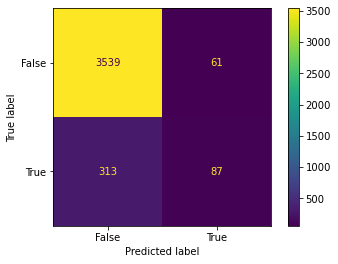

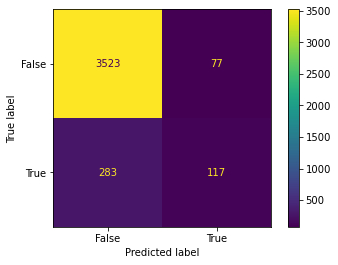

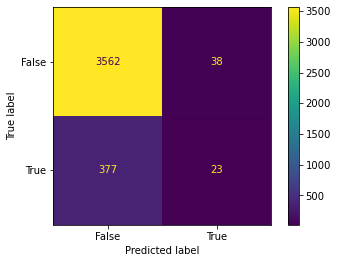

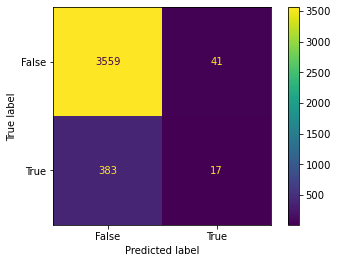

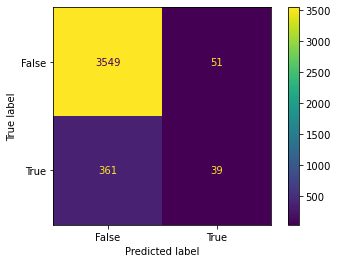

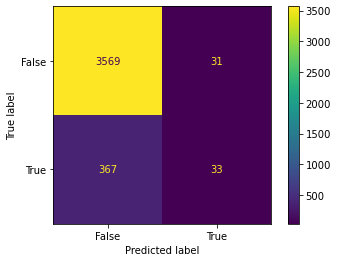

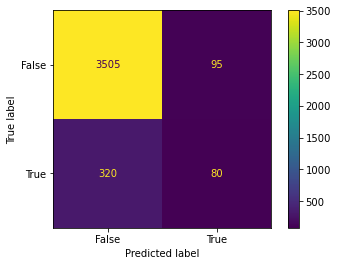

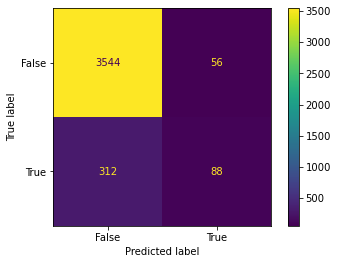

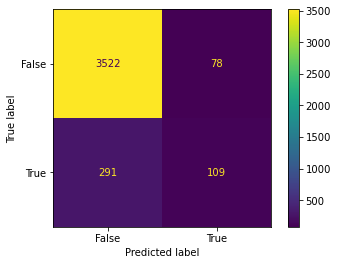

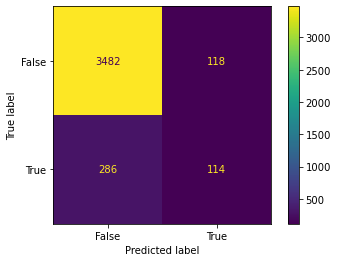

In [21]:
#define the 10 models of the OVR strategy and print the accuracy score and plot the confusion matrix for each model
logistic_One_VS_Rest0 = logistic_One_VS_Rest(X_train,Y_train,X_test,Y_test, 0)
logistic_One_VS_Rest1 = logistic_One_VS_Rest(X_train,Y_train,X_test,Y_test, 1)
logistic_One_VS_Rest2 = logistic_One_VS_Rest(X_train,Y_train,X_test,Y_test, 2)
logistic_One_VS_Rest3 = logistic_One_VS_Rest(X_train,Y_train,X_test,Y_test, 3)
logistic_One_VS_Rest4 = logistic_One_VS_Rest(X_train,Y_train,X_test,Y_test, 4)
logistic_One_VS_Rest5 = logistic_One_VS_Rest(X_train,Y_train,X_test,Y_test, 5)
logistic_One_VS_Rest6 = logistic_One_VS_Rest(X_train,Y_train,X_test,Y_test, 6)
logistic_One_VS_Rest7 = logistic_One_VS_Rest(X_train,Y_train,X_test,Y_test, 7)
logistic_One_VS_Rest8 = logistic_One_VS_Rest(X_train,Y_train,X_test,Y_test, 8)
logistic_One_VS_Rest9 = logistic_One_VS_Rest(X_train,Y_train,X_test,Y_test, 9)

In [23]:
#add all the 10 models to 
models = [logistic_One_VS_Rest0,
       logistic_One_VS_Rest1,
       logistic_One_VS_Rest2,
       logistic_One_VS_Rest3,
       logistic_One_VS_Rest4,
       logistic_One_VS_Rest5,
       logistic_One_VS_Rest6,
       logistic_One_VS_Rest7, 
       logistic_One_VS_Rest8,
       logistic_One_VS_Rest9]

In [64]:
logistic_One_VS_Rest0

array([1.12299866e-02, 7.58721833e-01, 1.35838524e-04, ...,
       4.73002582e-03, 3.21052548e-02, 7.92184485e-04])

In [24]:
#argmax of the probabilities to obtain the predicted class
accuracy_score(Y_test, np.argmax(np.array(models) , axis = 0))

0.38875

<AxesSubplot:>

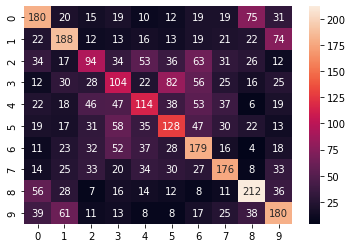

In [25]:
#plot the confusion matrix  
conf_matrix = confusion_matrix(Y_test, np.argmax(np.array(models) , axis = 0)) 
plt.subplot()
sns.heatmap(conf_matrix, annot = True, fmt ='g')

## Part 3. Support Vector Machine (SVM) Classification (4 Marks)

In Part 3. you will use Scikit-learn to perform classification, again on the Cifar10 dataset. You can use the built in SVM library for classification. As with logistic regression, SVM is designed for binary classification. However, in this case Scikit-learn will handle the OvR models behind the scenes.

Your task is to compare different modes of the SVM and determine the best performer. 

Create an SVM baseline using the <code>LinearSVC()</code> function. Make sure to use the primal solution and use "ovr" for multiclass Calculate the accuracy score for comparison.

Next you will explore the effect of the cost parameter on the accuracy.
    <ul>
    <li>Run the classification with a range of C values For example: [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]</li>
    <li>Plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>

Add a regularization term.
    <ul>
    <li>Rerun the above experiment, but this time use L1 regularization.</li>
    <li>Again, plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>

For the final experiment you will use the ```SVC()``` function to run the classifer with a kernel.
    <ul>
    <li>Use a radial basis function when training a new model</li>
    <li>Find the optimal combination of values for the cost and gamma parameters. Use the following values in your loop:<br/>
        <div style="margin-left:40px"><code>
        for cost in [0.01, 0.1, 1, 10, 100]:<br/>
        &emsp;for gamma in [0.01, 0.1, 1, 10, 100]:
        </code></div>
    </li>
    <li>Again, plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>


Choose the model with the highest accuracy and plot the confusion matrix. In your discussion explain the results of your experiments and the reason for increased performance from the baseline (if any). Comment on the effect of the cost-paramenter and the L1 penalty on accuracy as well as any overfitting you observed. Discuss the confusion matrix of the model accuracy and provide some reasons for high-values found off the main diagonal.


In [42]:
#create the Linear SVC baseline model
Baseline_Linear_SVC_Model = LinearSVC(multi_class='ovr', dual = False)
print(Baseline_Linear_SVC_Model)

LinearSVC(dual=False)


In [41]:
#fit the baseline model to the data
Baseline_Linear_SVC_Model.fit(X_train, Y_train)

#calculate the accuracy score of the model
Baseline_Linear_SVC_Model_accuracy = Baseline_Linear_SVC_Model.score(X_train, Y_train)

#accuracy of the baseline model
print("Linear_SVC_Model_accuracy: ", Baseline_Linear_SVC_Model_accuracy)

Linear_SVC_Model_accuracy:  0.391


### **Explore the effect of the cost parameter on the accuracy**

In [8]:
#Run the classification with a range of C values For example: [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]
ovr_accuracies_list = []

#for loop for prediction
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]

#loop in the cost C
for i in C:
    
    #assign the C value as i 
    OVR_Linear_SVC_Model = LinearSVC(multi_class='ovr', C= i, random_state = 0)
    
    #fit the ovr model to the data
    OVR_Linear_SVC_Model.fit(X_train, Y_train)
    
    #prediction of ovr model
    OVR_Predictions = OVR_Linear_SVC_Model.predict(X_test)
    
    #calculate accuracy of ovr model
    OVR_accuracy = accuracy_score(Y_test, OVR_Predictions)
    
    #append all the accuracies in a list
    ovr_accuracies_list.append({'C': i, 'OVR_accuracy': OVR_accuracy})

C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  re

In [9]:
#convert the accuracies list to a dataframe
ovr_accuracies_list = pd.DataFrame(ovr_accuracies_list)
ovr_accuracies_list

,C,OVR_accuracy
0,0.0001,0.38825
1,0.0010,0.40300
2,0.0100,0.38900
3,0.1000,0.35225
4,1.0000,0.27300
5,10.0000,0.29000
6,100.0000,0.25500
7,1000.0000,0.27500


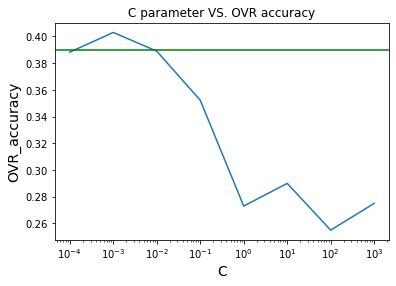

In [45]:
c = np.array(C)
fig, ax = plt.subplots()

#define the x axis as a logarithmic scale
ax.set_xscale('log')

#set the title of the graph
plt.title('C parameter VS. OVR accuracy')

#set the numbers to plot in x and y axises
plt.plot(ovr_accuracies_list['C'], ovr_accuracies_list['OVR_accuracy'])

#set the baseline of Baseline model to compare with
plt.axhline(y = (Baseline_Linear_SVC_Model_accuracy), color = 'g')

#set the title  of x and y axises
plt.xlabel('C', size=14)
plt.ylabel('OVR_accuracy', size=14)

#show the plot using matplotlib
plt.show()

### **Add a regularization term**

In [32]:
ovr_accuracies_list2 = []

#for loop for prediction
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]

for i in C:
    #fit the model with the regularization term
    OVR_Linear_SVC_Model2 = LinearSVC(penalty = 'l1',dual=False, multi_class='ovr', C= i, random_state = 0)
    OVR_Linear_SVC_Model2.fit(X_train, Y_train)
    
    #prediction of the model 
    OVR_Predictions2 = OVR_Linear_SVC_Model2.predict(X_test)
    
    #print the accuracy of the model
    OVR_accuracy2 = accuracy_score(Y_test, OVR_Predictions2)
    
    #append all the accuracies in a list
    ovr_accuracies_list2.append({'C': i, 'OVR_accuracy2': OVR_accuracy2})

C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\mm\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\mm\anaconda3\l

In [33]:
#convert the accuracies list to a dataframe
ovr_accuracies_list2 = pd.DataFrame(ovr_accuracies_list2)
ovr_accuracies_list2

,C,OVR_accuracy2
0,0.0001,0.10000
1,0.0010,0.22600
2,0.0100,0.36925
3,0.1000,0.39625
4,1.0000,0.34550
5,10.0000,0.33825
6,100.0000,0.33550
7,1000.0000,0.33525


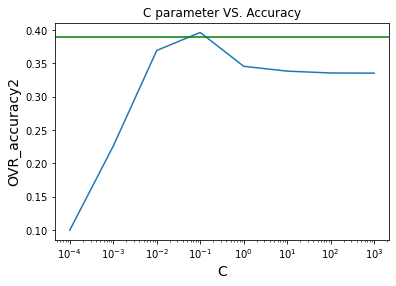

In [46]:
#set the x axis to the logarithmic scale
c = np.array(C)
fig, ax = plt.subplots()
ax.set_xscale('log')

#set the title of the graph
plt.title('C parameter VS. Accuracy')

plt.plot(ovr_accuracies_list2['C'], ovr_accuracies_list2['OVR_accuracy2'])

#plot the baseline accuracy with a green line 
plt.axhline(y = (Baseline_Linear_SVC_Model_accuracy), color = 'g')


plt.xlabel('C', size=14)
plt.ylabel('OVR_accuracy2', size=14)

#show the plot
plt.show()

### **Use the SVC() function to run the classifer with a kernel.**

In [24]:
from sklearn.svm import SVC
svc_accuracies_list = []

#for loop for prediction
for cost in [0.01, 0.1, 1, 10, 100]:
    for gamma_range in [0.01, 0.1, 1, 10, 100]:
        
        #fit the model using c and gamma ranges 
        svc_model = SVC(kernel='rbf', probability=True, C = cost, gamma= gamma_range, random_state = 0)
        svc_model.fit(X_train, Y_train)
        
        #for model prediction and accuracy 
        svc_Predictions = svc_model.predict(X_test)
        
        svc_accuracy = accuracy_score(Y_test, svc_Predictions)
        
        svc_accuracies_list.append({'C': cost, 'gamma':gamma_range, 'svc_accuracy': svc_accuracy})

C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  re

In [25]:
#convert the accuracies list to a dataframe
svc_accuracies_list = pd.DataFrame(svc_accuracies_list)
svc_accuracies_list

,C,gamma,svc_accuracy
0,0.01,0.01,0.26850
1,0.01,0.10,0.10425
2,0.01,1.00,0.10250
3,0.01,10.00,0.22700
4,0.01,100.00,0.10000
5,0.10,0.01,0.37800
6,0.10,0.10,0.10425
7,0.10,1.00,0.10250
8,0.10,10.00,0.22800
9,0.10,100.00,0.10000


#### **plot the accuracies where gamma = 0.01**

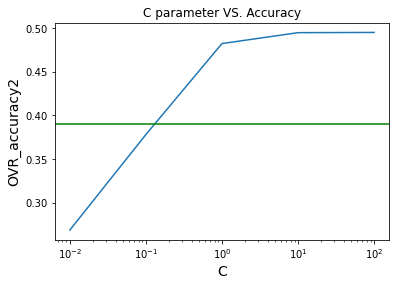

In [13]:
# importing package
import matplotlib.pyplot as plt
import numpy as np

#when gamma = 0.01
#set the x axis to the logarithmic scale
c = [0.01, 0.10, 1.00, 10.00, 100.00]
a = [0.26850, 0.37800, 0.48225, 0.49475, 0.49500]

c = np.array(c)
fig, ax = plt.subplots()
ax.set_xscale('log')

#set the title of the graph
plt.title('C parameter VS. Accuracy')

plt.plot(c, a)

#plot the baseline accuracy with a green line 
plt.axhline(y = (Baseline_Linear_SVC_Model_accuracy), color = 'g')


plt.xlabel('C', size=14)
plt.ylabel('OVR_accuracy2', size=14)

#show the plot
plt.show()


In [10]:
from sklearn.svm import SVC

#fit the model using c = 100 and gamma = 0.01 
higher_svc_model = SVC(kernel='rbf', probability=True, C = 100, gamma= 0.01, random_state = 0)
higher_svc_model.fit(X_train, Y_train)
        
#for model prediction and accuracy 
higher_Model_accuracy = higher_svc_model.score(X_train, Y_train)

print("Higher_SVC_Model_accuracy: ", higher_Model_accuracy)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Higher_SVC_Model_accuracy:  1.0


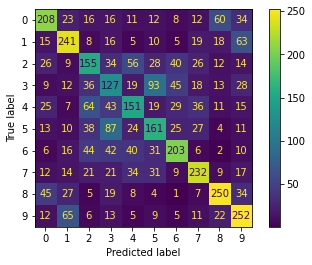

In [11]:
plot_confusion_matrix(higher_svc_model,X_test,  Y_test)

- According to the main diagonal, the model can not classify the classes well, for example, the model classified 208 from airplane class as airplane, but the actual number of airplane class is 400 images.
- Another example on the car class, the model classify 241 images are car, so, the model is not efficient for classifying image data.

- For the high values like 250, the model classified the ship class as ship, and this is good for this class.

- So, we can say that the hyperparameter tuning can make difference on the model accuracy and prediction, but trying to choose the best parameter for the model.

### Bonus Mark
Instead of using raw pixel values compute an alternate feature representation for your dataset and re-run train the model. Compare the accuracy of the model using the new feature representation with the model trained with pixel values.

In [53]:
#apply pca for dimensionality reduction
pca_dims = PCA()

#fit the train data to pca
pca_dims.fit(X_train)
cumsum = np.cumsum(pca_dims.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [55]:
pca = PCA(n_components=d)

#reduce the dimensions of data
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [56]:
print("reduced shape: " + str(X_reduced.shape))
print("recovered shape: " + str(X_recovered.shape))

reduced shape: (16000, 213)
recovered shape: (16000, 3072)


In [57]:
#apply ovr model to reduced data
clf_reduced = LinearSVC(multi_class='ovr', random_state = 0)

#fit the model with reduced data
clf_reduced.fit(X_reduced,Y_train)

C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\mm\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(random_state=0)

In [58]:
X_test_reduced = pca.transform(X_test)

y_hat_reduced = clf_reduced.predict(X_test_reduced)

#print the accuracy after training
print("accuracy: " + str(accuracy_score(Y_test, y_hat_reduced)))

accuracy: 0.38925


### **Apply a range of cost values to the model**

In [59]:
#Run the classification with a range of C values For example: [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]
pca_ovr_accuracies_list = []

#for loop for prediction
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]

#loop in the cost C
for i in C:
    
    #assign the C value as i 
    pca_OVR_Linear_SVC_Model = LinearSVC(multi_class='ovr', C= i, random_state = 0)
    
    #fit the ovr model to the data
    pca_OVR_Linear_SVC_Model.fit(X_reduced,Y_train)
    
    #prediction of ovr model
    pca_OVR_Predictions = pca_OVR_Linear_SVC_Model.predict(X_test_reduced)
    
    #calculate accuracy of ovr model
    pca_OVR_accuracy = accuracy_score(Y_test, y_hat_reduced)
    
    #append all the accuracies in a list
    pca_ovr_accuracies_list.append({'C': i, 'pca_OVR_accuracy': pca_OVR_accuracy})

C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  re

In [60]:
#convert the accuracies list to a dataframe
pca_ovr_accuracies_list = pd.DataFrame(pca_ovr_accuracies_list)
pca_ovr_accuracies_list

,C,pca_OVR_accuracy
0,0.0001,0.38925
1,0.0010,0.38925
2,0.0100,0.38925
3,0.1000,0.38925
4,1.0000,0.38925
5,10.0000,0.38925
6,100.0000,0.38925
7,1000.0000,0.38925


### **Apply l1 regularization with a range of cost**

In [61]:
#Run the classification with a range of C values For example: [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]
pca_ovr_accuracies_list2 = []

#for loop for prediction
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]

#loop in the cost C
for i in C:
    
    #assign the C value as i 
    pca_OVR_Linear_SVC_Model2 = LinearSVC(penalty = 'l1',dual=False, multi_class='ovr', C= i, random_state = 0)
    
    #fit the ovr model to the data
    pca_OVR_Linear_SVC_Model2.fit(X_reduced,Y_train)
    
    #prediction of ovr model
    pca_OVR_Predictions2 = pca_OVR_Linear_SVC_Model2.predict(X_test_reduced)
    
    #calculate accuracy of ovr model
    pca_OVR_accuracy2 = accuracy_score(Y_test, y_hat_reduced)
    
    #append all the accuracies in a list
    pca_ovr_accuracies_list2.append({'C': i, 'pca_OVR_accuracy2': pca_OVR_accuracy2})

C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  re

In [62]:
#convert the accuracies list to a dataframe
pca_ovr_accuracies_list2 = pd.DataFrame(pca_ovr_accuracies_list2)
pca_ovr_accuracies_list2

,C,pca_OVR_accuracy2
0,0.0001,0.38925
1,0.0010,0.38925
2,0.0100,0.38925
3,0.1000,0.38925
4,1.0000,0.38925
5,10.0000,0.38925
6,100.0000,0.38925
7,1000.0000,0.38925


## Part 4. Write a Conclusion (1 Mark)

Write a conclusion comparing the results from each part of the assignment. Comment on the suitability of each method for this task.

- This assignment tried to classify the 10 classes of cifar10 dataset, using classical supervised machine learning algorithms using:
     KNN model, logistic regression using OVR strategy and Linear SVC model using OVR strategy.
     
- The data consists of 60000 images, so this assignment runs on 16000 sample for training and 4000 sample for testing, according to the computation power.

- After developing the KNN model, the accuracy score = 0.302 for the optimal k where k = 10, and the KNN model cann't clasify the classes well. 


- The logistic regression model using a developed function for OVR strategy, the accuracy score = 0.38875, the model can not classify the 10 classes well, but the model can classify each class against all the classes well, as it shown in the accuracies of each model in the 10 models.


- The LinearSVC model has an accuracy score = 0.391 and this is not enough for classification tasks.


- So, apply the tuning will increase the accuracy, when taking a range for the cost parameter, the accuracy score = 0.40300 when c = 0.0010


- When applying the L1 regularization with a range of cost parameter, the accuracy score = 0.396 when C = 0.0100, there is no sign for overfitting, as the model didn't learn well from the data.


- When applying the cost parameter with gamma parameter with a range:
       
       
       - The accuracy score = 0.48225 when c = 1.00 and gamma = 0.01
       
       - The accuracy score = 0.49475 when c = 10.00 and gamma = 0.01
       
       - The accuracy score = 0.49500 when c = 100.00 and gamma = 0.01
       
- So, the accuracy increased when gamma = 0.01

- After applysing PCA dimensionality reduction, the accuracy is not good enough for classifying the images.

- Finally, the classical supervised machine learning models are not good to classify images data. 

<!-- Write your conclusion here -->